Read data and fill the blank

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# column index
col_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
df = pd.read_csv('processed.cleveland.data', names=col_names)
df.head()

# use mean value to fill nan
for col in col_names:
    df[col].fillna(df[col].mean(), inplace=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.000000,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.000000,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.000000,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.000000,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.000000,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.000000,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.000000,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.000000,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.000000,3.0,1


In [10]:
sample_num = df.shape[0]
feat_num = df.shape[1] - 1
class_num = np.unique(np.array(df['num']))

print('Sample Number:\t', sample_num)
print('Feature Number:\t', feat_num)
print('Class Number:\t', class_num)

Sample Number:	 303
Feature Number:	 13
Class Number:	 [0 1 2 3 4]


It is an two-class classify problem, `0` for no heart disease, else are all diseases

In [11]:
X = np.array(df[col_names[0:feat_num]])
y0 = np.array(df['num'])
y = np.zeros(sample_num)

# Fill into two classes
for i in range(sample_num):
    if y0[i] > 0:
        y[i] = 1

print(X.shape)
print(y)

(303, 13)
[0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1.
 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1.
 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1.
 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0.
 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0.
 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0.]


## Cluster

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

n_clusters = 2

# Standardization
scal = StandardScaler()
Xscal = scal.fit_transform(X)
print(X)
print(Xscal)

# Cluster
cluster = KMeans(n_clusters=n_clusters, random_state=0)
yhat = cluster.fit_predict(Xscal)

# Print accurancy
print('accurancy {0:.4f}'.format(np.mean(y == yhat)))


[[63.         1.         1.        ...  3.         0.         6.       ]
 [67.         1.         4.        ...  2.         3.         3.       ]
 [67.         1.         4.        ...  2.         2.         7.       ]
 ...
 [57.         1.         4.        ...  2.         1.         7.       ]
 [57.         0.         2.        ...  2.         1.         3.       ]
 [38.         1.         3.        ...  1.         0.6722408  3.       ]]
[[ 0.94872647  0.68620244 -2.25177456 ...  2.27457861 -0.72309499
   0.65581797]
 [ 1.39200191  0.68620244  0.87798549 ...  0.64911323  2.50385129
  -0.89852225]
 [ 1.39200191  0.68620244  0.87798549 ...  0.64911323  1.42820253
   1.17393137]
 ...
 [ 0.28381332  0.68620244  0.87798549 ...  0.64911323  0.35255377
   1.17393137]
 [ 0.28381332 -1.4572959  -1.20852121 ...  0.64911323  0.35255377
  -0.89852225]
 [-1.82174501  0.68620244 -0.16526786 ... -0.97635214  0.
  -0.89852225]]
accurancy 0.1650


The result is not satisfying

Probabaly it is because this data is not suitable for cluster method

## PCA Graph

Decide to use PCA to find out principal feature

In [191]:
from sklearn.decomposition import PCA

# Construct the PCA object
ncomp = 2
pca = PCA(n_components=ncomp, 
          svd_solver='randomized', whiten=True)

# Fit and transform the data
pca.fit(X)
Z = pca.transform(X)

Text(0, 0.5, 'PC 1')

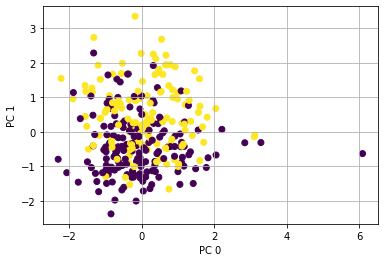

In [192]:
# Plot the first two coefficients
plt.scatter(Z[:,0], Z[:,1], c=y)
plt.grid()
plt.xlabel('PC 0')
plt.ylabel('PC 1')

We can see that these data cannot be easily devided into two groups.

I think this may be the reason why cluster does not perform well

Also, svm may not suitble for this data set.

## Logistic Regression

Try to use a more mathematical solution

In [193]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_fscore_support
from sklearn import linear_model

# Use 10 folds to train and varify
nfold = 10
kf = KFold(n_splits=nfold, shuffle=True)
prec = []
rec = []
f1 = []
err_rate = []
c_list = np.logspace(-5, -2, 4)
print(c_list)

for c in c_list:
    logreg = linear_model.LogisticRegression(C=c, solver='liblinear')
    for Itr, Its in kf.split(X):
        # Get training and test data
        Xtr = X[Itr]
        ytr = y[Itr]
        Xts = X[Its]
        yts = y[Its]
        
        # Transform the data
        xscal = StandardScaler()
        Xtr1 = xscal.fit_transform(Xtr)
        Xts1 = xscal.transform(Xts)
            
        # Fit a model
        logreg.fit(Xtr1, ytr)
        
        # Predict the labels on the test data
        yhat = logreg.predict(Xts1)
        
        # Measure the precision, recall and f1-score.
        preci,reci,f1i,_= precision_recall_fscore_support(yts,yhat,average='binary') 
        prec.append(preci)
        rec.append(reci)
        f1.append(f1i)
        err_rate.append(np.mean(yts != yhat))

    # Take the mean performance metrics over the different folds.
    prec = np.mean(prec)
    rec = np.mean(rec)
    f1 = np.mean(f1)
    err_mean = np.mean(err_rate)

    print('C =          {0:f}'.format(c))
    print('Precision =  {0:.4f}'.format(prec))
    print('Recall =     {0:.4f}'.format(rec))
    print('f1 =         {0:.4f}'.format(f1))
    print('error rate = {0:.4f}'.format(err_mean))
    print()

    prec = []
    rec = []
    f1 = []
    err_rate = []

[1.e-05 1.e-04 1.e-03 1.e-02]
C =          0.000010
Precision =  0.8389
Recall =     0.7852
f1 =         0.8086
error rate = 0.1586

C =          0.000100
Precision =  0.8436
Recall =     0.7990
f1 =         0.8173
error rate = 0.1615

C =          0.001000
Precision =  0.8524
Recall =     0.7895
f1 =         0.8121
error rate = 0.1616

C =          0.010000
Precision =  0.8449
Recall =     0.7970
f1 =         0.8138
error rate = 0.1626



All model's precision are around 85%, which means, logistic regression does have a better performance than cluster

## Neural Network
Now try NN

In [194]:
from sklearn.model_selection import train_test_split

# Split into train set and test set
# Set test size to 10%
Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=0.1)

xmean = np.mean(Xtr,axis=0)
xstd = np.std(Xtr,axis=0)
Xtr_scale = (Xtr-xmean[None,:])/xstd[None,:]
Xts_scale = (Xts-xmean[None,:])/xstd[None,:]

In [195]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation
import tensorflow.keras.backend as K

K.clear_session()

In [204]:
# Try 3 learning rates
rates = [0.02, 0.01, 0.005]

# A bit large batch size and epoch
batch_size = 100
epoch = 40
loss_hist = []
acc_hist = []

for lr in rates:
    # Clear the session
    K.clear_session()

    # Build the model
    # Input: feature number
    # Output: class number
    nin = Xtr.shape[1]
    nout = np.max(ytr)+1

    # Try to build a deeper network
    nh = 256
    nh2 = 64
    model = Sequential()
    model.add(Dense(nh, input_shape=(nin,), activation='sigmoid', name='hidden'))
    model.add(Dense(nh2, input_shape=(nh,), activation='sigmoid', name='hidden2'))
    model.add(Dense(nout, activation='softmax', name='output'))

    # Select the optimizer with the correct learning rate to test
    opt = optimizers.Adam(lr=lr) 
    model.compile(optimizer=opt,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])       
        
    # Fit the model    
    hist = model.fit(Xtr_scale, ytr,
              epochs=epoch,
              batch_size=batch_size, 
              validation_data=(Xts_scale,yts))    
    
    # Save the loss history
    loss_hist.append(hist.history['loss'])
    acc_hist.append(hist.history['val_acc'])

    # Print the final accuracy
    val_acc = hist.history['val_acc'][-1]
    print("lr=%12.4e test accuracy=%f" % (lr, val_acc))

Train on 272 samples, validate on 31 samples
Epoch 1/40
272/272 [==============================] - 0s 363us/sample - loss: 1.9237 - acc: 0.4963 - val_loss: 2.6082 - val_acc: 0.4194
Epoch 2/40
272/272 [==============================] - 0s 40us/sample - loss: 1.5465 - acc: 0.5551 - val_loss: 0.7484 - val_acc: 0.4194
Epoch 3/40
272/272 [==============================] - 0s 33us/sample - loss: 0.6330 - acc: 0.5551 - val_loss: 0.7096 - val_acc: 0.5806
Epoch 4/40
272/272 [==============================] - 0s 33us/sample - loss: 0.8389 - acc: 0.4449 - val_loss: 0.6025 - val_acc: 0.5806
Epoch 5/40
272/272 [==============================] - 0s 33us/sample - loss: 0.6262 - acc: 0.5662 - val_loss: 0.6293 - val_acc: 0.6452
Epoch 6/40
272/272 [==============================] - 0s 37us/sample - loss: 0.5602 - acc: 0.7610 - val_loss: 0.7025 - val_acc: 0.6129
Epoch 7/40
272/272 [==============================] - 0s 37us/sample - loss: 0.5238 - acc: 0.7721 - val_loss: 0.5988 - val_acc: 0.6452
Epoch 8/4

Generate graph

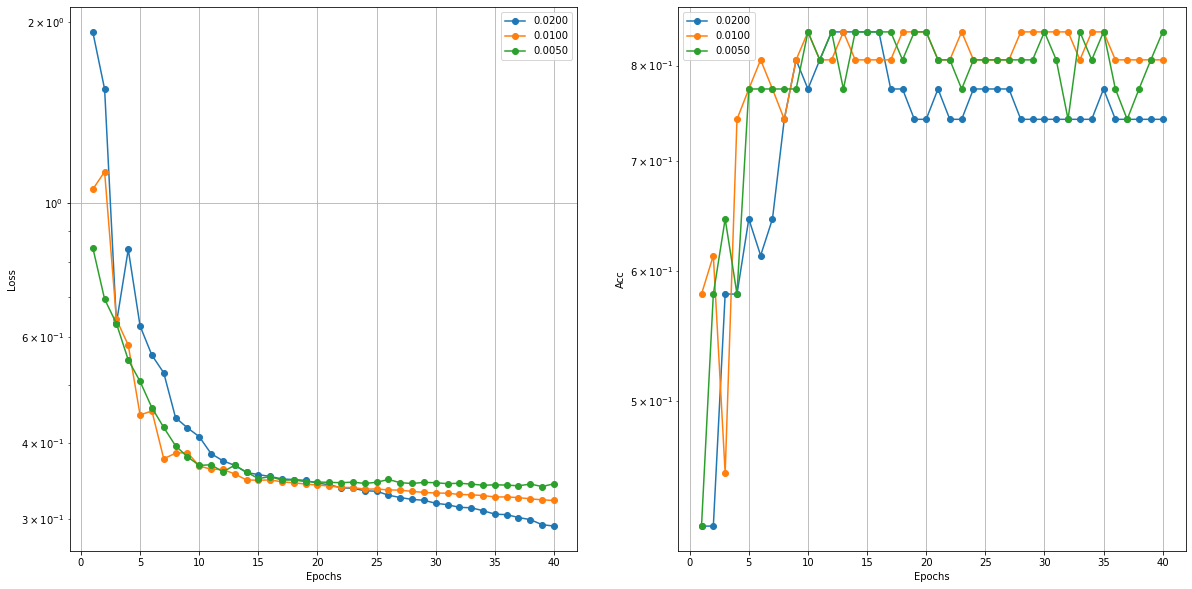

In [205]:
plt.figure(figsize=(20, 10))

plt.subplot(1,2,1)
for it, loss in enumerate(loss_hist):
    epochs = np.arange(1, epoch + 1)
    plt.semilogy(epochs, loss, 'o-')

rate_str = ['{0:5.4f}'.format(lr) for lr in rates]

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(rate_str)
plt.grid()

plt.subplot(1,2,2)
for it, acc in enumerate(acc_hist):
    epochs = np.arange(1, epoch + 1)
    plt.semilogy(epochs, acc, 'o-')

rate_str = ['{0:5.4f}'.format(lr) for lr in rates]

plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(rate_str)
plt.grid()

In [208]:
print(np.array(acc_hist)[:,-1])

[0.7419355  0.8064516  0.83870965]
